In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('owid-covid-data.csv')
df.columns
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
# Missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 iso_code                                        0
continent                                   14352
location                                        0
date                                            0
total_cases                                 35741
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       292217
excess_mortality_cumulative                292217
excess_mortality                           292217
excess_mortality_cumulative_per_million    292217
Length: 67, dtype: int64


In [7]:
# Clean Data

In [24]:
# Focus on selected countries
countries = ["Mozambique", "Kenya", "United States", "India"]
df_filtered = df[df["location"].isin(countries)]

# Convert date
df_filtered["date"] = pd.to_datetime(df_filtered["date"])

# Drop rows missing critical values
df_filtered = df_filtered.dropna(subset=["total_cases", "total_deaths"], how="any")

# Fill missing values (for vaccination columns for example)
df_filtered = df_filtered.fillna(method="ffill")


C:\Users\ricma\AppData\Local\Temp\ipykernel_22168\3717863895.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ricma\AppData\Local\Temp\ipykernel_22168\3717863895.py:12: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [25]:
# Exploratory Data Analysis (EDA)

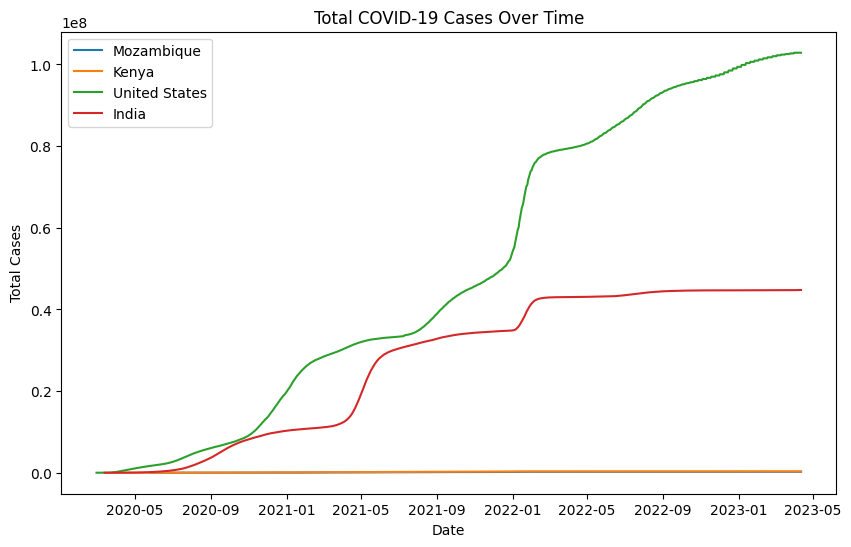

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line chart: total cases
plt.figure(figsize=(10,6))
for country in countries:
    data = df_filtered[df_filtered["location"] == country]
    plt.plot(data["date"], data["total_cases"], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

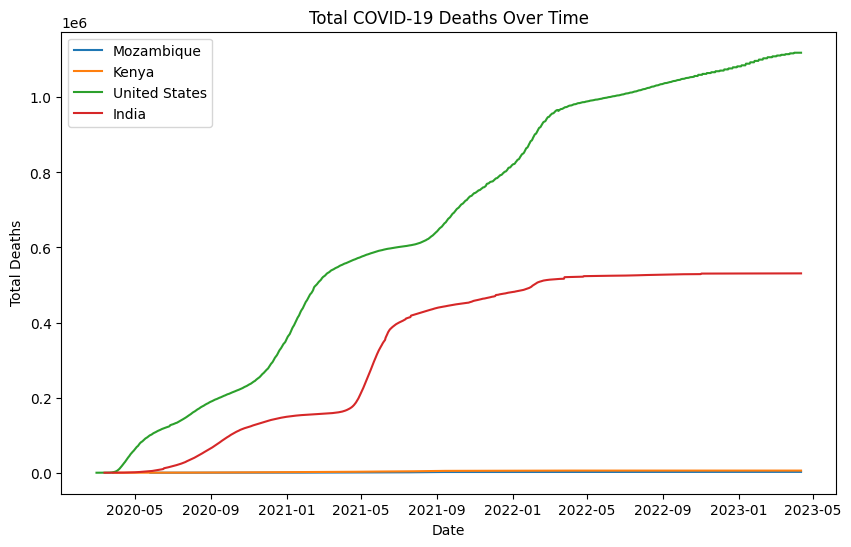

In [27]:
# Line chart: total deaths
plt.figure(figsize=(10,6))
for country in countries:
    data = df_filtered[df_filtered["location"] == country]
    plt.plot(data["date"], data["total_deaths"], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()

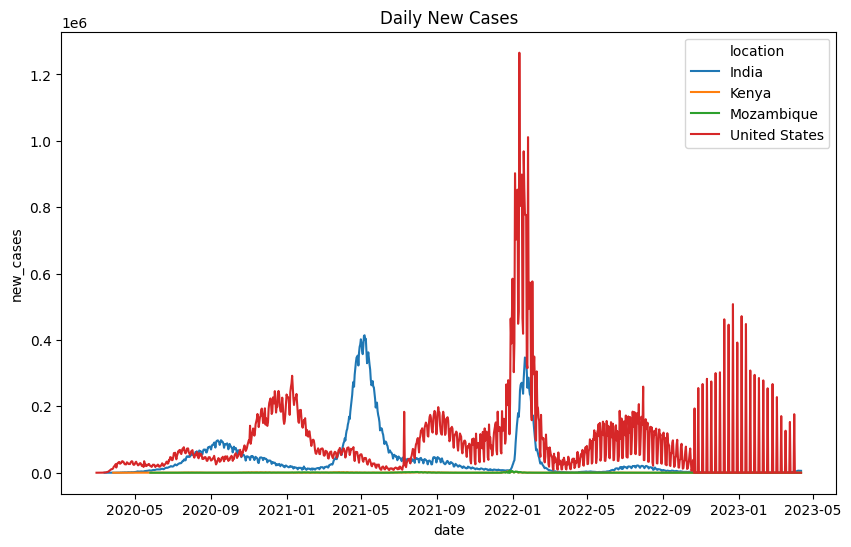

In [28]:
# Daily new cases comparison
plt.figure(figsize=(10,6))
sns.lineplot(data=df_filtered, x="date", y="new_cases", hue="location")
plt.title("Daily New Cases")
plt.show()

In [29]:
# Death rate = total_deaths / total_cases
df_filtered["death_rate"] = df_filtered["total_deaths"] / df_filtered["total_cases"]

In [30]:
# Vaccination Progress

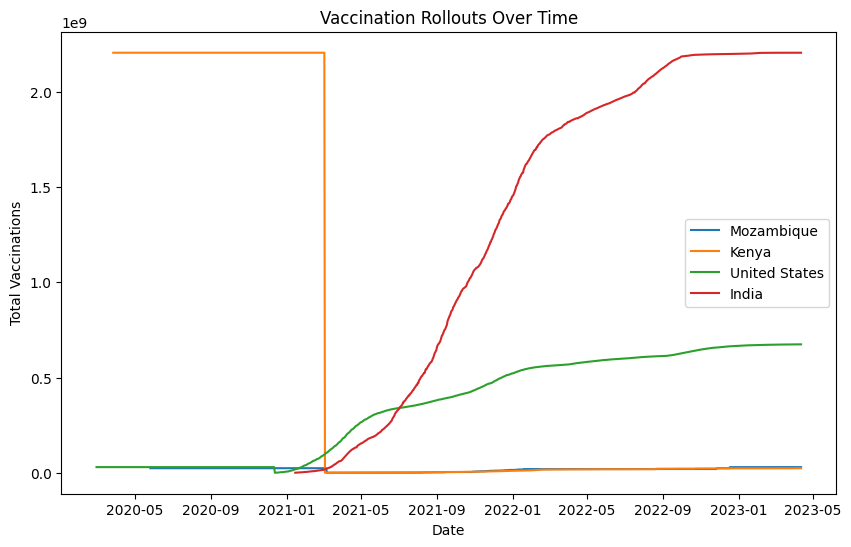

In [31]:
# Vaccination trends
plt.figure(figsize=(10,6))
for country in countries:
    data = df_filtered[df_filtered["location"] == country]
    plt.plot(data["date"], data["total_vaccinations"], label=country)
plt.title("Vaccination Rollouts Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.show()


In [32]:
# Choropleth Map

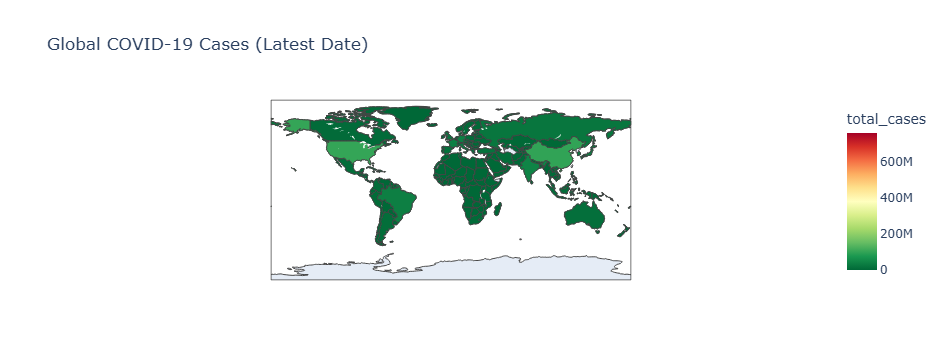

In [33]:
import plotly.express as px

# Latest snapshot
latest = df[df["date"] == df["date"].max()]

fig = px.choropleth(
    latest,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="RdYlGn_r",
    title="Global COVID-19 Cases (Latest Date)"
)
fig.show()
